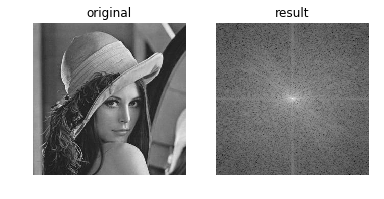

In [7]:
%matplotlib inline
#14.2 Numpy实现傅里叶变换
#14.2.1 实现傅里叶变换
#利用函数numpy.fft.fft2()实现傅里叶变换，然后numpy.fft.fftshift()将零频率成分移到中间
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread("lena.png",0)
f=np.fft.fft2(img)
fshift=np.fft.fftshift(f)
magnitude_spectrum=20*np.log(np.abs(fshift))
plt.subplot(121)
plt.imshow(img,cmap="gray")
plt.title("original")
plt.axis("off")
plt.subplot(122)
plt.imshow(magnitude_spectrum,cmap="gray")
plt.title("result")
plt.axis("off")
plt.show()

[[134.+8.16334654e-16j 132.+1.42241993e-15j 132.-1.83615318e-15j ...
   94.-1.08225099e-14j  94.-6.75563202e-15j  96.-1.12135390e-15j]
 [134.+4.47708919e-15j 133.+1.13593154e-14j 133.-3.62366437e-15j ...
   95.-8.15760649e-15j  96.-4.03157366e-15j  97.+2.23528115e-15j]
 [134.+2.30701495e-15j 133.+7.06417391e-15j 133.+6.98168030e-16j ...
   98.+6.28702345e-16j  99.+1.01265735e-15j 100.+7.47097140e-15j]
 ...
 [106.-7.45699405e-15j 114.-1.48088738e-15j 124.-1.38092692e-15j ...
   48.+8.76728517e-16j  49.-2.06073009e-15j  50.-1.08740334e-14j]
 [105.-2.72402149e-15j 114.+7.04103604e-16j 124.+1.84888051e-14j ...
   48.-6.04911334e-15j  48.+4.10848340e-15j  49.+2.08342450e-14j]
 [105.-3.18742813e-15j 114.-7.36233746e-15j 125.-3.64703348e-16j ...
   47.-5.39290792e-15j  48.+1.28750099e-15j  49.+1.65221499e-14j]]
[[134. 132. 132. ...  94.  94.  96.]
 [134. 133. 133. ...  95.  96.  97.]
 [134. 133. 133. ...  98.  99. 100.]
 ...
 [106. 114. 124. ...  48.  49.  50.]
 [105. 114. 124. ...  48.  48. 

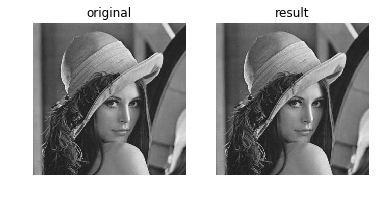

In [2]:
#14.2.2 实现逆傅里叶变换
#numpy.fft.ifft2可以实现逆傅里叶变换
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread("lena.png",0)
f=np.fft.fft2(img)
fshift=np.fft.fftshift(f)
ishift=np.fft.ifftshift(fshift)
iimg=np.fft.ifft2(ishift)
print(iimg)
iimg=np.abs(iimg)
print(iimg)
plt.subplot(121)
plt.imshow(img,cmap="gray")
plt.title("original"),plt.axis("off")
plt.subplot(122)
plt.imshow(iimg,cmap="gray")
plt.title("result"),plt.axis("off")
plt.show()

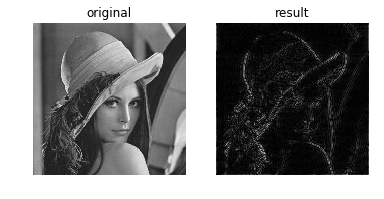

In [3]:
#14.2.3 高通滤波示例
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread("lena.png",0)
f=np.fft.fft2(img)
fshift=np.fft.fftshift(f)
rows,cols=img.shape
crow,ccol=int(rows/2),int(cols/2)
fshift[crow-30:crow+30,ccol-30:ccol+30]=0
ishift=np.fft.ifftshift(fshift)
iimg=np.fft.ifft2(ishift)
iimg=np.abs(iimg)
plt.subplot(121)
plt.imshow(img,cmap="gray")
plt.title("original"),plt.axis("off")
plt.subplot(122)
plt.imshow(iimg,cmap="gray")
plt.title("result"),plt.axis("off")
plt.show()

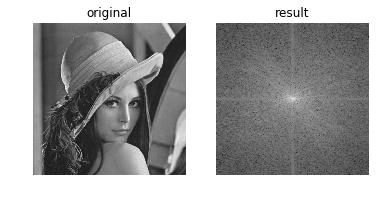

In [4]:
#14.3 OpenCV实现傅里叶变换
#14.3.1 利用函数cv2.dft()实现傅里叶变换
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread("lena.png",0)
dft=cv2.dft(np.float32(img),flags=cv2.DFT_COMPLEX_OUTPUT)
dftshift=np.fft.fftshift(dft)
result=20*np.log(cv2.magnitude(dftshift[:,:,0],dftshift[:,:,1]))
plt.subplot(121)
plt.imshow(img,cmap="gray")
plt.title("original"),plt.axis("off")
plt.subplot(122)
plt.imshow(result,cmap="gray")
plt.title("result"),plt.axis("off")
plt.show()

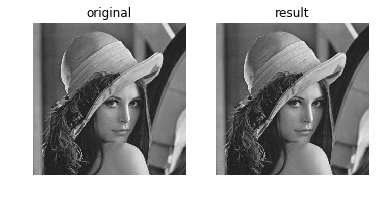

In [5]:
#14.3.2 利用函数cv2.idft()实现逆傅里叶变换
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread("lena.png",0)
dft=cv2.dft(np.float32(img),flags=cv2.DFT_COMPLEX_OUTPUT)
dftshift=np.fft.fftshift(dft)
ishift=np.fft.ifftshift(dftshift)
iImg=cv2.idft(ishift)
iImg=cv2.magnitude(iImg[:,:,0],iImg[:,:,1])
plt.subplot(121)
plt.imshow(img,cmap="gray")
plt.title("original"),plt.axis("off")
plt.subplot(122)
plt.imshow(iImg,cmap="gray")
plt.title("result"),plt.axis("off")
plt.show()

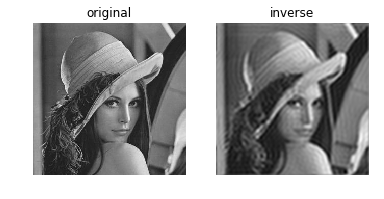

In [6]:
#14.3.3 低通滤波
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread("lena.png",0)
dft=cv2.dft(np.float32(img),flags=cv2.DFT_COMPLEX_OUTPUT)
dftshift=np.fft.fftshift(dft)
rows,cols=img.shape
crow,ccol=int(rows/2),int(cols/2)
mask=np.zeros((rows,cols,2),np.uint8)
#两个通道，与频率图像匹配
mask[crow-30:crow+30,ccol-30:ccol+30]=1
fshift=dftshift*mask
ishift=np.fft.ifftshift(fshift)
iImg=cv2.idft(ishift)
iImg=cv2.magnitude(iImg[:,:,0],iImg[:,:,1])
plt.subplot(121)
plt.imshow(img,cmap="gray")
plt.title("original"),plt.axis("off")
plt.subplot(122)
plt.imshow(iImg,cmap="gray")
plt.title("inverse"),plt.axis("off")
plt.show()